In [1]:
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import random

In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255
x_test=x_test/255

In [5]:
import keras
model=Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))


C:\Users\spgir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
          

In [7]:
model.compile(optimizer="sgd",loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [8]:
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7337 - loss: 1.0268 - val_accuracy: 0.9018 - val_loss: 0.3571
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9019 - loss: 0.3557 - val_accuracy: 0.9169 - val_loss: 0.2930
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9156 - loss: 0.2964 - val_accuracy: 0.9272 - val_loss: 0.2593
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9250 - loss: 0.2673 - val_accuracy: 0.9333 - val_loss: 0.2351
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9333 - loss: 0.2388 - val_accuracy: 0.9392 - val_loss: 0.2152
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9381 - loss: 0.2214 - val_accuracy: 0.9425 - val_loss: 0.2001
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9442 - loss: 0.1992 - val_accuracy: 0.9470 - val_loss: 0.1869
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9486 - loss: 0.188

In [9]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.4f"%test_loss)
print("Accuracy=%4f"%test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9481 - loss: 0.1819
Loss=0.1585
Accuracy=0.954900


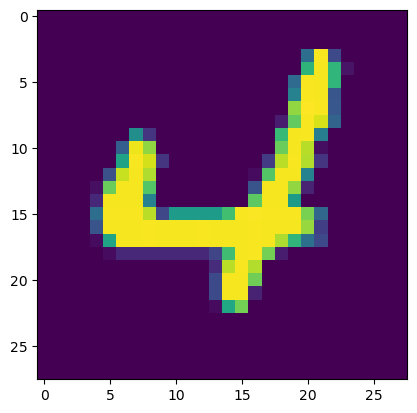

In [10]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()


In [11]:
prediction=model.predict(x_test)
print("The handwritten number in the image is %d"%np.argmax(prediction[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
The handwritten number in the image is 4


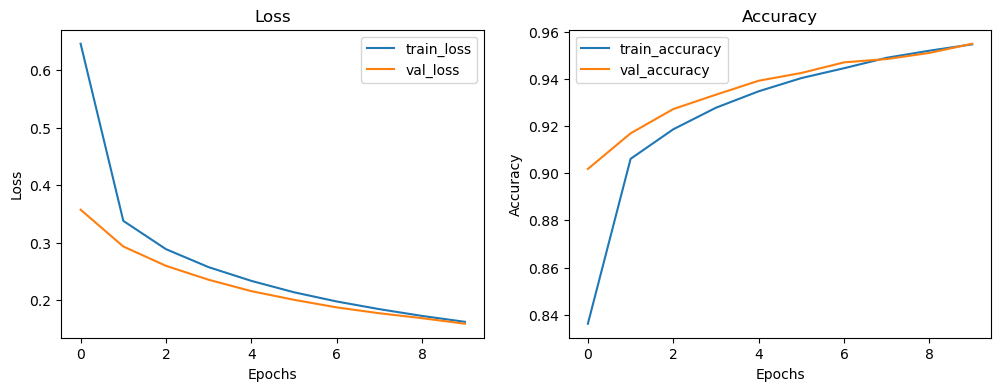

In [12]:
# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(H.history['loss'], label='train_loss')
plt.plot(H.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(H.history['accuracy'], label='train_accuracy')
plt.plot(H.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

